# Challenge 0

In [4]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.version

'3.6.5 (default, Jun 17 2018, 12:15:43) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]'

In [5]:
! pip freeze
! pip --version

certifi==2018.8.24
pip 18.0 from /Users/ibrahimmuhammad/miniconda3/envs/py35/lib/python3.5/site-packages/pip (python 3.5)


In [6]:
! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.4M  100 33.4M    0     0  3523k      0  0:00:09  0:00:09 --:--:-- 5201k


# Challenge 1

In [7]:
import requests

def predict(image_url):
    prediction_url = 'https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/095eac50-bf07-4100-8352-80ff06aee711/url?iterationId=2d6a978e-d4a6-4770-ba4b-9529224b5cc1'
    data = {"Url": image_url}
    headers = {
        'Prediction-Key': 'a99c55c1f6a740c3862bb1ffba0d3d4c',
        'Content-Type': 'application/json'
    }

    response = requests.post(prediction_url, json=data, headers=headers)
    return response.json()

In [8]:
from pprint import pprint
pprint(predict('https://image.sportsmansguide.com/adimgs/l/6/673942i3_ts.jpg'))

{'created': '2018-10-02T20:53:26.153978Z',
 'id': '05059cd0-eae1-4bdf-b6c4-fcc04b624e64',
 'iteration': '2d6a978e-d4a6-4770-ba4b-9529224b5cc1',
 'predictions': [{'probability': 1.0,
                  'tagId': 'a91fc173-47bc-4d62-b395-4295884004a3',
                  'tagName': 'insulated_jacket'},
                 {'probability': 7.454575e-21,
                  'tagId': 'f6010827-8174-4eb6-8523-f1d4b913318e',
                  'tagName': 'hardshell_jacket'}],
 'project': '095eac50-bf07-4100-8352-80ff06aee711'}


# Challenge 2

In [10]:
def equalize(image):
    streched_img = skimage.exposure.equalize_adapthist(image, clip_limit=0.05)
    img_min = streched_img.min()
    img_max = streched_img.max()
    return ((streched_img - img_min) / (img_max - img_min) * 255).astype(np.uint8)

In [22]:
import numpy as np
import skimage.io
import skimage.util
import skimage.exposure
import skimage.transform
import matplotlib.pyplot as plt

IMAGE_SIZE = 128
N_CHANNELS = 3

def pad(image):
    h, w, c = image.shape
    delta = abs(h - w)
    if h > w:
        return skimage.util.pad(img, ((0, 0), (delta//2, delta//2), (0, 0)), 'constant', constant_values=255)
    elif w > h:
        return skimage.util.pad(img, ((delta//2, delta//2), (0, 0), (0, 0)), 'constant', constant_values=255)
    else:
        return image
    
def preprocess(image):
    padded_img = pad(img)
    resized_img = skimage.transform.resize(padded_img, (IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS))
    equalized_img = equalize(resized_img)
    return equalized_img
    
filename = 'data/input/insulated_jackets/10312601x1128398_zm.jpeg'
img = skimage.io.imread(filename)
padded_img = pad(img)
padded_img.shape

preprocessed_img = preprocess(img)

(400, 366, 3)
(128, 128, 3)


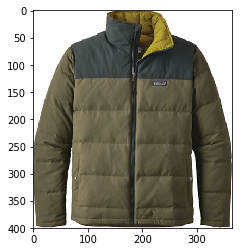

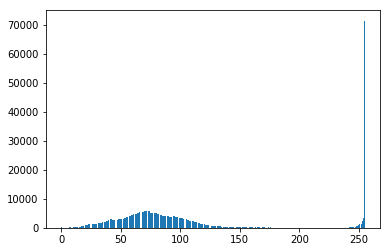

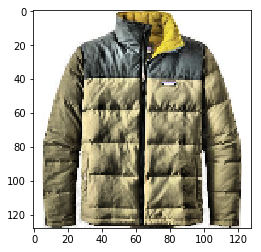

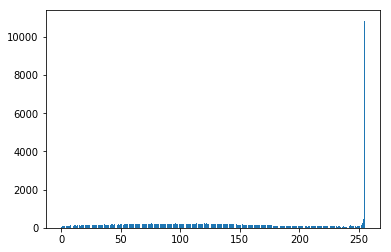

In [23]:
def inspect_image(img):
    plt.figure()
    plt.imshow(img, vmin=0, vmax=255)
    print(img.shape)
    y, x = skimage.exposure.histogram(img)
    plt.figure()
    plt.bar(x , y)
    
inspect_image(img)
inspect_image(preprocess(img))

In [16]:
import glob
import tqdm

INPUT_PATH = 'data/input/**/**'

preprocessed_images = []
labels = []

image_files = glob.glob(INPUT_PATH)
for filename in tqdm.tqdm(image_files):
    label = filename.split('/')[2]
    img = skimage.io.imread(filename)
    preprocessed_img = preprocess(img)
    preprocessed_images.append(preprocessed_img)

100%|██████████| 2122/2122 [01:07<00:00, 31.51it/s]


In [18]:
np.save('data/preprocessed.npy', np.array(preprocessed_images))
np.save('data/labels.npy', np.array(labels))

In [20]:
np.array(preprocessed_images).shape

(2122, 128, 128, 3)